<a href="https://colab.research.google.com/github/anmolg1997/Regression_projects/blob/main/Price%20Optimisation%20based%20on%20Price%20Elasticity/Retail_Price_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
#current dir
os.chdir(r"/content/drive/MyDrive/Colab Notebooks/ML/Regression/Retail Price Optimization")
cwd = os.getcwd()
cwd

'/content/drive/MyDrive/Colab Notebooks/ML/Regression/Retail Price Optimization'


## Introduction to Price Optimization





---

Pricing a product is a crucial aspect of any business. A lot of thought process is put into it. There are different strategies to estimate prices for different kinds of products. There are products whose sales are pretty sensitive to their costs, and as such, a slight change in their price can lead to a noticeable difference in their sales. At the same time, there are also products whose sales are not much affected by their worth - these tend to be luxury items or necessities (like certain medicines). 


---


 

Price elasticity of demand (EPD), or elasticity, is the degree to which the compelling desire for something changes as its price changes. In general, people desire things less as those things become more expensive. However, for some products, the customers’ desire could drop sharply even with a bit of price increase, and for other products, it could stay almost the same even with a hefty price increase. Economists use the term elasticity to denote this sensitivity of sales to price fluctuations. More precisely, price elasticity gives the percentage change in quantity demanded when there is a one percent increase in price, holding everything else constant.



---

Mathematically speaking, the price elasticity of demand is defined to be the percentage change in quantity demanded, q,divided by the percentage change in price, p. The formula for the price elasticity (ǫ) is: $$e = \%ΔQ/ \%ΔP$$


---


## Dynamic Pricing Dataset

The data is contained in three CSV files.

**[Cafe - Sell MetaData.csv](https://drive.google.com/file/d/1AartKSv1lNjuSCvZM_7e4imQz6PdvNiZ/view?usp=sharing)** This file has details about sales made by the cafe. 

Columns: Sell ID, Sell Category, Item ID, Item Name

**[Cafe - Transaction - Store.csv](https://drive.google.com/file/d/1nRh8qj9c1AR7KNkqbUdJ8UFRcaSSFxQo/view?usp=sharing)** This file contains information about transactions and sale receipts of the cafe.

Columns: Calendar Date, Price, Quantity, Sell ID, Sell Category

**[Cafe - DateInfo.csv](https://drive.google.com/file/d/16yR2_ubn0SfbfXeX_NwpMKZGkSzUyT4J/view?usp=sharing)** This has date information corresponding to the transactions performed.

Columns: Date, Year, Holiday, Weekend, School Break, Temperature, Outdoor


## Objective

In this work, we shall look at the sales of the items of a cafe. This cafe sells burgers, coke, lemonade and coffee. As a data scientist, it is our task to figure out the optimal prices to set for these items. If the price is set too high, the sales will drop & the price is set to low, then the margins will decrease. What is the sweet spot that will give us the maximum profit?

In [9]:
# install the required packages
!pip install pandas
!pip install numpy
!pip install statsmodels
!pip install matplotlib
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
# Importing the required Librabies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [12]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Loading the Data

In [13]:
# load the datasets
sold = pd.read_csv('Cafe - Sell Meta Data.csv')
transactions = pd.read_csv('Cafe - Transaction - Store.csv')
date_info = pd.read_csv('Cafe - DateInfo.csv')

In [14]:
# check for first 5 rows
sold.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


In [15]:
#describe
sold.describe()
sold.describe(include=['O'])

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [16]:
# check for null
sold[sold.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


SELL_ID: a categorical variable, identifier of the combination of items that is contained in the product.

SELL_CATEGORY: “0” identifies single products; the category “2” identifies the combo ones.

ITEM_ID: a categorical variable, identifier of the item that is contained in the product.

ITEM_NAME: a categorical variable, identifying the name of the item

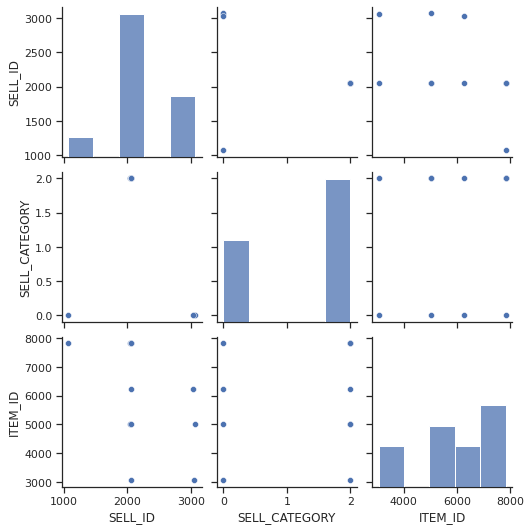

In [17]:
# plot a pairplot for the data
sns.pairplot(sold)

In [18]:
# check for first 5 rows
transactions.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [19]:
# describe
transactions.describe()
transactions.describe(include = ['O'])

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [20]:
# check for nulls
transactions[transactions.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


Important: It’s supposed the PRICE for that product in that day will not vary.

In details: CALENDAR_DATE: a date/time variable, having the time always set to 00:00 AM.

PRICE: a numeric variable, associated with the price of the product identified by the SELL_ID.

QUANTITY: a numeric variable, associated with the quantity of the product sold, identified by the SELL_ID.

SELL_ID: a categorical variable, identifier of the product sold.

SELL_CATEGORY: a categorical variable, category of the product sold.

(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

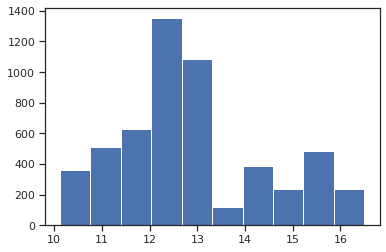

In [21]:
# plot histogram to check data distribution
plt.hist(transactions.PRICE)

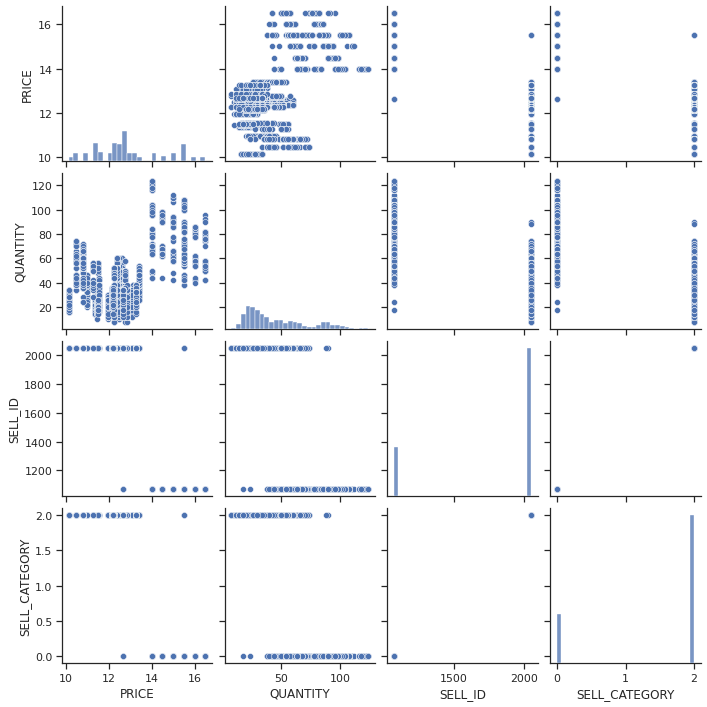

In [22]:
# plot a pairplot for the data
sns.pairplot(transactions)

In [23]:
# check for first 5 rows
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [24]:
# describe
date_info.describe()
date_info.describe(include = ['O'])

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [25]:
# check datatypes
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [26]:
# check for null
date_info[date_info.isnull().any(axis=1)].head()
date_info[date_info.isnull().any(axis=1)].shape


,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0
5,1/6/12,2012,NaN,0,0,23.0,0
6,1/7/12,2012,NaN,1,0,26.6,0
7,1/8/12,2012,NaN,1,0,26.6,0


(1244, 7)

In [27]:
# null value imputation
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday")

In [28]:
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


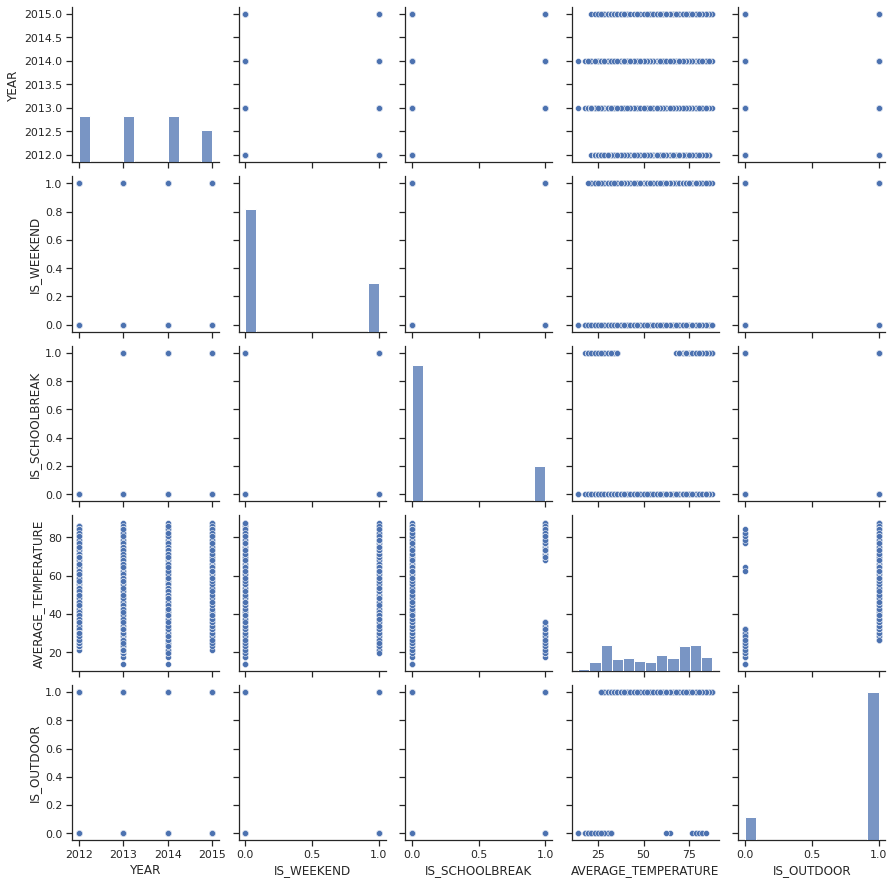

In [29]:
# pairplot 
sns.pairplot(date_info)

## Understanding the data better


In [30]:
# check for unique values
np.unique(date_info['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [31]:
# minimum date
date_info['CALENDAR_DATE'].min()

'1/1/12'

In [32]:
# maximum date
date_info['CALENDAR_DATE'].max()

'9/9/15'

In [33]:
# shape of data
date_info.shape

(1349, 7)

#### One Hot *Encoding*

In [34]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1 )

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,3055,0,1,0,0
2,3067,0,0,1,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,0,1,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,0,1,0


In [35]:
sell_g = pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1 ).groupby(['SELL_ID']).sum()
sell_g

,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,
1070,1,0,0,0
2051,1,0,1,0
2052,1,0,0,1
2053,1,1,1,0
3028,0,0,0,1
3055,0,1,0,0
3067,0,0,1,0


In [36]:
trans_g = pd.merge(transactions, sell_g, on =  'SELL_ID' )
trans_g['BURGER'] = trans_g['BURGER']*trans_g['QUANTITY']
trans_g['COFFEE'] = trans_g['COFFEE']*trans_g['QUANTITY']
trans_g['COKE'] = trans_g['COKE']*trans_g['QUANTITY']
trans_g['LEMONADE'] = trans_g['LEMONADE']*trans_g['QUANTITY']
trans_g = trans_g.sort_values(by= ['CALENDAR_DATE', 'SELL_ID' ]).reset_index(drop=True)
trans_g.head()
print(trans_g.shape)

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,BURGER,COFFEE,COKE,LEMONADE
0,01/01/12,15.50,46,1070,0,46,0,0,0
1,01/01/12,12.73,22,2051,2,22,0,22,0
2,01/01/12,12.75,18,2052,2,18,0,0,18
3,01/01/12,12.60,30,2053,2,30,30,30,0
4,01/01/13,15.50,60,1070,0,60,0,0,0


(5404, 9)


#### Multiple rows for same date in date_info

In [37]:
date_info.shape

(1349, 7)

In [38]:
len(np.unique(date_info.CALENDAR_DATE))

1348

In [39]:
date_info.CALENDAR_DATE.value_counts().head(  )

3/1/13     2
1/1/12     1
6/16/14    1
6/24/14    1
6/23/14    1
Name: CALENDAR_DATE, dtype: int64

In [40]:
date_info[date_info.CALENDAR_DATE == '3/1/13']

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
424,3/1/13,2013,No Holiday,0,0,39.2,1
425,3/1/13,2013,No Holiday,0,0,32.0,1


In [41]:
trans_g[trans_g.CALENDAR_DATE == '3/1/13']

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,BURGER,COFFEE,COKE,LEMONADE


No treatment needed as no transaction had happened on that day !!

#### CALENDAR_DATES from Transaction for which more info is available in date_info

In [42]:
trans_g.CALENDAR_DATE[(trans_g.CALENDAR_DATE.isin(date_info.CALENDAR_DATE))].shape

(3348,)

In [43]:
trans_g.CALENDAR_DATE[~(trans_g.CALENDAR_DATE.isin(date_info.CALENDAR_DATE))].shape

(2056,)

## Combined Data

In [44]:
combined_data = pd.merge(trans_g, date_info, on='CALENDAR_DATE')
combined_data.shape
combined_data.head(5)


(3348, 15)

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,BURGER,COFFEE,COKE,LEMONADE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/13/12,15.50,100,1070,0,100,0,0,0,2012,No Holiday,0,0,26.6,0
1,1/13/12,12.73,40,2051,2,40,0,40,0,2012,No Holiday,0,0,26.6,0
2,1/13/12,12.75,26,2052,2,26,0,0,26,2012,No Holiday,0,0,26.6,0
3,1/13/12,12.60,58,2053,2,58,58,58,0,2012,No Holiday,0,0,26.6,0
4,1/13/13,15.50,70,1070,0,70,0,0,0,2013,No Holiday,1,0,30.2,0


In [45]:
combined_data[combined_data.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,BURGER,COFFEE,COKE,LEMONADE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [46]:
print(np.unique(combined_data['HOLIDAY']) )
print(np.unique(combined_data['IS_WEEKEND']))
print(np.unique(combined_data['IS_SCHOOLBREAK']))

['Dragon Boat Festivel' 'Labor Day' 'Luner New Year' 'Mid-Autumn Day'
 'No Holiday']
[0 1]
[0 1]


#### bau DATA

In [47]:
bau_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0)]
bau_data.shape
bau_data.head()

(1884, 15)

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,BURGER,COFFEE,COKE,LEMONADE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/13/12,15.50,100,1070,0,100,0,0,0,2012,No Holiday,0,0,26.6,0
1,1/13/12,12.73,40,2051,2,40,0,40,0,2012,No Holiday,0,0,26.6,0
2,1/13/12,12.75,26,2052,2,26,0,0,26,2012,No Holiday,0,0,26.6,0
3,1/13/12,12.60,58,2053,2,58,58,58,0,2012,No Holiday,0,0,26.6,0
8,1/13/14,15.50,104,1070,0,104,0,0,0,2014,No Holiday,0,0,28.4,0


(array([447., 425., 258., 193.,  80.,  45., 247., 126.,  47.,  16.]),
 array([ 16. ,  26.8,  37.6,  48.4,  59.2,  70. ,  80.8,  91.6, 102.4,
        113.2, 124. ]),
 <a list of 10 Patch objects>)

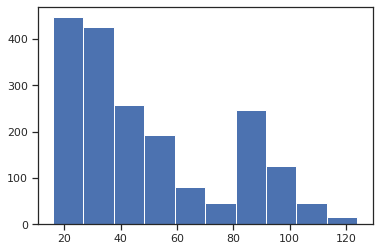

In [48]:
# Data exploration
plt.hist(bau_data.BURGER)

(array([154., 174., 205., 472., 372.,  36., 122., 111., 174.,  64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

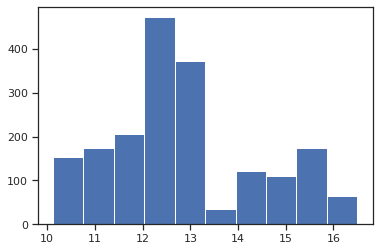

In [49]:
# histogram plot
plt.hist(bau_data.PRICE)

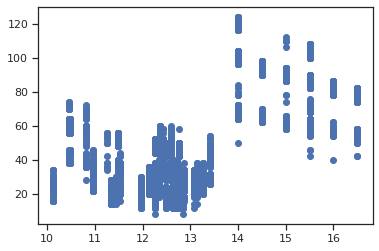

In [50]:
# scatter plot 
plt.scatter(combined_data['PRICE'], combined_data['BURGER'])

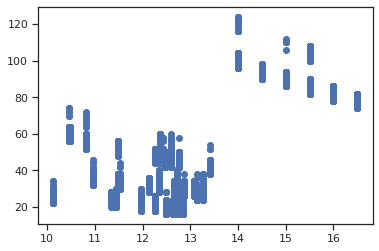

In [51]:
# scatter plot 
plt.scatter(bau_data['PRICE'], bau_data['BURGER'])

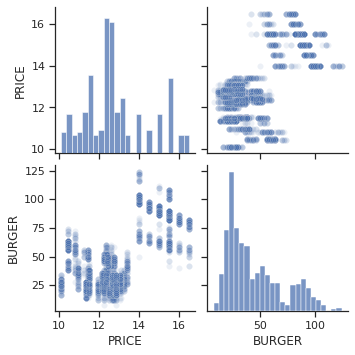

In [52]:
sns.pairplot(combined_data[['PRICE','BURGER']], plot_kws={'alpha':0.1})

In [53]:
np.unique(combined_data.SELL_ID)

array([1070, 2051, 2052, 2053])

In [54]:
np.unique(combined_data.SELL_CATEGORY)

array([0, 2])

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,BURGER,COFFEE,COKE,LEMONADE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/13/12,15.5,100,1070,0,100,0,0,0,2012,No Holiday,0,0,26.6,0
4,1/13/13,15.5,70,1070,0,70,0,0,0,2013,No Holiday,1,0,30.2,0
8,1/13/14,15.5,104,1070,0,104,0,0,0,2014,No Holiday,0,0,28.4,0
12,1/13/15,14.0,116,1070,0,116,0,0,0,2015,No Holiday,0,0,28.4,0
16,1/14/12,15.5,74,1070,0,74,0,0,0,2012,No Holiday,1,0,23.0,0


,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,BURGER,COFFEE,COKE,LEMONADE,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.000000,837.000000,837.0,837.0,837.000000,837.0,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000
mean,15.154719,82.685783,1070.0,0.0,82.685783,0.0,0.0,0.0,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.744770,15.981238,0.0,0.0,15.981238,0.0,0.0,0.0,1.063043,0.451373,0.400776,20.005316,0.327324
min,14.000000,40.000000,1070.0,0.0,40.000000,0.0,0.0,0.0,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,14.500000,68.000000,1070.0,0.0,68.000000,0.0,0.0,0.0,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,15.500000,86.000000,1070.0,0.0,86.000000,0.0,0.0,0.0,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,15.500000,92.000000,1070.0,0.0,92.000000,0.0,0.0,0.0,2014.000000,1.000000,0.000000,75.200000,1.000000
max,16.500000,124.000000,1070.0,0.0,124.000000,0.0,0.0,0.0,2015.000000,1.000000,1.000000,87.800000,1.000000


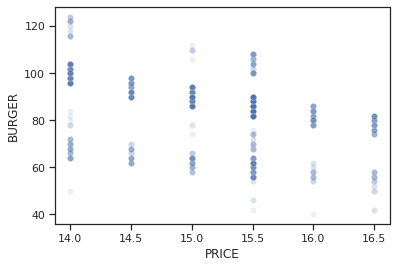

In [56]:
burger_1070 = combined_data[(combined_data['SELL_ID'] == 1070)]
burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.BURGER, alpha = 0.1)

## Modeling